<a href="https://colab.research.google.com/github/Anusha-Kasina/weed_detection/blob/master/conv2d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
#kaggle username from api token 
os.environ['KAGGLE_USERNAME'] = "anushakasina"
#kaggle key from api token
os.environ['KAGGLE_KEY'] ="ddb898e4090e073a6d8ebd4a4a47701c"
#dataset path for downloading the data
!kaggle datasets download -d fpeccia/weed-detection-in-soybean-crops

100% 2.35G/2.37G [01:04<00:00, 20.1MB/s]
100% 2.37G/2.37G [01:04<00:00, 39.3MB/s]


In [2]:
from zipfile import ZipFile
#filename = zip file path 
file_name = "/content/weed-detection-in-soybean-crops.zip"
#to extract the zip file
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('done')

done


In [0]:
os.mkdir("/content/train_data")
os.mkdir("/content/train_data/broadleaf")
os.mkdir("/content/train_data/grass")
os.mkdir("/content/train_data/soil")
os.mkdir("/content/train_data/soybean")


In [0]:
os.mkdir("/content/test_data")
os.mkdir("/content/test_data/broadleaf")
os.mkdir("/content/test_data/grass")
os.mkdir("/content/test_data/soil")
os.mkdir("/content/test_data/soybean")

In [0]:
from shutil import copyfile 
import random

In [6]:
def split_data(source,training,testing,split_size):
  files = []
  for filename in os.listdir(source):
    file = source+filename
    files.append(filename)
    #calculating the total number of images in the original dataset
    training_length = int(len(files)*split_size)
    shuffled_set = random.sample(files,len(files))
    #80% of the images to training set
    training_set = shuffled_set[0:training_length]
    #20% of the images to testing set
    testing_set = shuffled_set[training_length:]
  #appending to training directory
  for filename in training_set:
    #source file name
    this_file = source+filename 
    #destination file name
    destination = training+filename 
    #coping from source to destination
    copyfile(this_file,destination) 
  #appending to testing directory        
  for filename in testing_set:
    #source file name
    this_file = source+filename 
    #destination file name
    destination = testing+filename 
    #coping from source to destination
    copyfile(this_file,destination)
#split_size = 0.8
split_data("/content/dataset/broadleaf/","/content/train_data/broadleaf/","/content/test_data/broadleaf/",0.8)
split_data("/content/dataset/grass/","/content/train_data/grass/","/content/test_data/grass/",0.8)
split_data("/content/dataset/soil/","/content/train_data/soil/","/content/test_data/soil/",0.8)
split_data("/content/dataset/soybean/","/content/train_data/soybean/","/content/test_data/soybean/",0.8)
print("done")

done


In [7]:
print("train-data-broadleaf",len(os.listdir('/content/train_data/broadleaf')),end=",")
print("test-data-broadleaf",len(os.listdir('/content/test_data/broadleaf')),end="\n")
print("train-data-grass",len(os.listdir('/content/train_data/grass')),end=",")
print("test-data-grass",len(os.listdir('/content/test_data/grass')),end="\n")
print("train-data-soil",len(os.listdir('/content/train_data/soil')),end=",")
print("test-data-soil",len(os.listdir('/content/test_data/soil')),end="\n")
print("train-data-soybean",len(os.listdir('/content/train_data/soybean')),end=",")
print("test-data-soybean",len(os.listdir('/content/test_data/soybean')),end="\n")

train-data-broadleaf 952,test-data-broadleaf 239
train-data-grass 2816,test-data-grass 704
train-data-soil 2599,test-data-soil 650
train-data-soybean 5900,test-data-soybean 1476


In [8]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

Using TensorFlow backend.


In [9]:
#train and test directories path
train_dir = '/content/train_data'
test_dir = '/content/test_data'
#normalising data by rescaling every image
train_gen_obj = ImageDataGenerator(rescale = 1.0/255.0)
test_gen_obj = ImageDataGenerator(rescale = 1.0/255.0)
#flow_from_directory command generates batches of randomly transformed images and saves the results to your preview directory
train_gen = train_gen_obj.flow_from_directory(train_dir, batch_size = 64, target_size = (150, 150), class_mode = 'categorical')
test_gen = test_gen_obj.flow_from_directory(test_dir, batch_size = 32, target_size = (150, 150), class_mode = 'categorical')

Found 12267 images belonging to 4 classes.
Found 3069 images belonging to 4 classes.


In [0]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense ,Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers


In [16]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(150, 150,3)))
# activation is relu
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# The second convolution
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# The third convolution
model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Flatten the results to feed into a DNN
model.add(Flatten())
# 64 neuron hidden layer
model.add(Dense(64))
model.add(Activation('relu'))
# 4 output neurons. It will either the broadleaf or grassor soil or soybean
model.add(Dense(4))
model.add(Activation('softmax'))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(150, 150,...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  # This is added back by InteractiveShellApp.init_path()


In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_6 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)       

In [0]:
# Compile Model. 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [19]:
#Train the Model
history = model.fit_generator(train_gen,
                              validation_data = test_gen,
                              epochs = 10, verbose = 1)

Epoch 1/10
192/192 [==============================] - 52s 270ms/step - loss: 0.4835 - acc: 0.8109 - val_loss: 0.4094 - val_acc: 0.8716
Epoch 2/10
192/192 [==============================] - 49s 256ms/step - loss: 0.3036 - acc: 0.8874 - val_loss: 0.1089 - val_acc: 0.8879
Epoch 3/10
192/192 [==============================] - 49s 256ms/step - loss: 0.2162 - acc: 0.9204 - val_loss: 0.0990 - val_acc: 0.8928
Epoch 4/10
192/192 [==============================] - 49s 255ms/step - loss: 0.1633 - acc: 0.9417 - val_loss: 0.4988 - val_acc: 0.9211
Epoch 5/10
192/192 [==============================] - 49s 255ms/step - loss: 0.1258 - acc: 0.9567 - val_loss: 0.0665 - val_acc: 0.9045
Epoch 6/10
192/192 [==============================] - 49s 255ms/step - loss: 0.0975 - acc: 0.9658 - val_loss: 0.1957 - val_acc: 0.9413
Epoch 7/10
192/192 [==============================] - 49s 255ms/step - loss: 0.0549 - acc: 0.9814 - val_loss: 0.1780 - val_acc: 0.9254
Epoch 8/10
192/192 [==============================] - 4

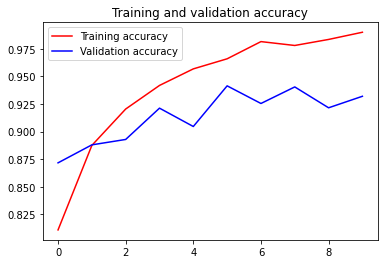

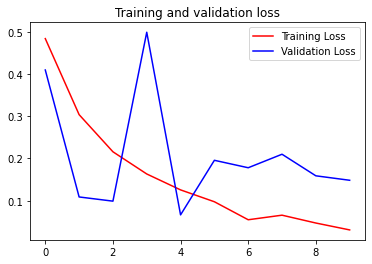

In [21]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
import os
#directory to store the images taken by drone
os.mkdir("testing_outputs")

In [0]:
source = "/content/testing_outputs/"
from skimage.transform import resize
from skimage.transform import resize
classification=['broad','grass','soil','soya']
for filename in os.listdir(source):
  #changing path to current directory
  os.chdir(source)
  #extracting the path
  this_file = source+filename 
  #extracting the image name
  this_file = this_file[25:]
  #storing image to new_image
  new_image=plt.imread(this_file)
  print(this_file)
  
  #to resize the image to match model input size
  resized_image = resize(new_image, (150,150,3))
  #to predict the input image using our model
  predictions = model.predict(np.array( [resized_image] ))
  #list_index defines 0 for broadleaf, 1 for grass,2 for soil,3 for soybean
  list_index = [0,1,2,3]
  #storing predicted output by the model to x
  x = predictions
  # arranging the list in such a way that highest probability list index comes to first position of the list
  for i in range(4):
    for j in range(4):
      if x[0][list_index[i]] > x[0][list_index[j]]:
        temp = list_index[i]
        list_index[i] = list_index[j]
        list_index[j] = temp
  #Show the sorted labels in order from highest probability to lowest
  print(list_index,end='\t')
  print(classification[list_index[0]],end='\t')
  if(classification[list_index[0]]=='broad'):
    print('weed',end='\n')
    
    print('...........')
    

  else:
    print("non weed",end='\n')
    print('...........')  
    
    

102.tif
[0, 1, 3, 2]	broad	weed
...........
1018.tif
[2, 1, 3, 0]	soil	non weed
...........
1032.tif
[3, 1, 0, 2]	soya	non weed
...........
101.tif
[3, 1, 0, 2]	soya	non weed
...........
106.tif
[0, 1, 3, 2]	broad	weed
...........
1.tif
[0, 1, 3, 2]	broad	weed
...........
3565.tif
[3, 1, 0, 2]	soya	non weed
...........
100.tif
[0, 1, 3, 2]	broad	weed
...........
4327.tif
[3, 1, 0, 2]	soya	non weed
...........
1025.tif
[0, 1, 3, 2]	broad	weed
...........
